In [1]:
import pylab
import numpy as np
import algorithms as algo

# Robust peak detection algorithm (using z-scores) 

(-1.5, 1.5)

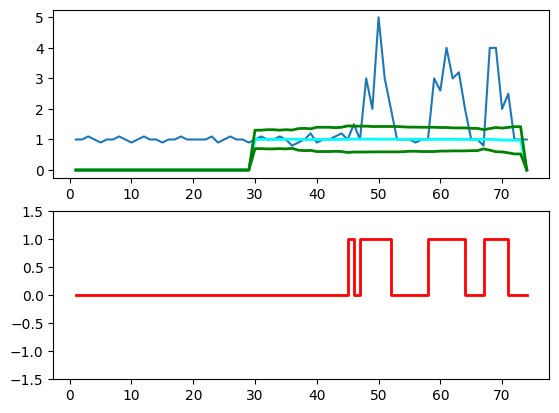

In [2]:
y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
       1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
       2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])

# Settings: lag = 30, threshold = 5, influence = 0
lag = 30
threshold = 5
influence = 0

# Run algo with settings from above
result = algo.thresholding_algo(y,
    lag=lag, 
    threshold=threshold, 
    influence=influence
)

# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)
pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)

In [3]:
import pandas as pd
dataset='datasets/export'
files = ["L110_0_B7_1","L110_0_B8_1","L187_0_B1_1", "L291_0_A1_1"]
i = 0
df= pd.read_table(f"{dataset}/{files[0]}.txt",
                  sep=" ", 
                  header=None,
                  names=['m/z', 'intensity']) 
df.head()

,m/z,intensity
0,1000.322,6006
1,1000.417,6134
2,1000.512,6233
3,1000.606,6247
4,1000.701,6301


(-1.5, 1.5)

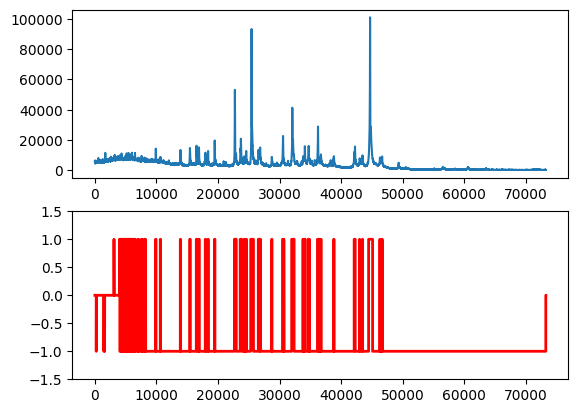

In [4]:
import matplotlib.pyplot as plt
y = df['intensity'].to_numpy()
# Settings: lag = 30, threshold = 5, influence = 0
lag = 30
threshold = 5
influence = 0

# Run algo with settings from above
result = algo.thresholding_algo(y,
    lag=lag, 
    threshold=threshold, 
    influence=influence
)

# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)
# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"], color="cyan", lw=2)

# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

# pylab.plot(np.arange(1, len(y)+1),
#            result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)

# SciPy: scipy.signal.find_peaks

In [5]:
from scipy.signal import find_peaks, peak_prominences

22


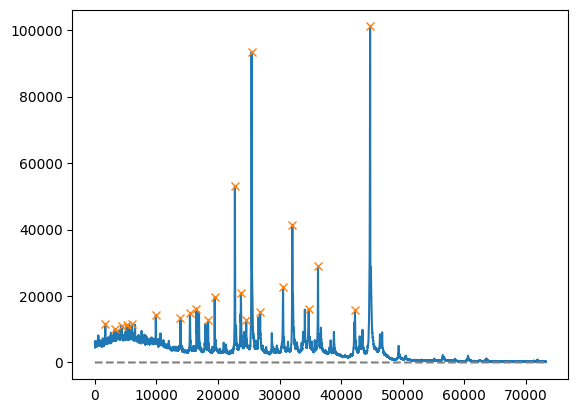

In [16]:
peaks, _ = find_peaks(y,distance=800, height=10000)
print(len(peaks))
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

In [7]:
prominences = peak_prominences(y, peaks)[0]
prominences

array([5.9640e+03, 3.6230e+03, 4.5460e+03, 4.4170e+03, 4.6390e+03,
       6.3430e+03, 4.7940e+03, 9.8630e+03, 9.9070e+03, 1.1322e+04,
       1.3276e+04, 1.0909e+04, 7.7480e+03, 9.7150e+03, 1.6827e+04,
       4.9305e+04, 1.7330e+03, 1.6928e+04, 8.4870e+03, 9.0741e+04,
       4.4000e+01, 6.0200e+03, 1.1030e+04, 1.9452e+04, 3.8880e+04,
       7.0760e+03, 9.3000e+02, 1.1547e+04, 1.3057e+04, 2.5888e+04,
       6.0110e+03, 3.6600e+03, 1.3063e+04, 9.9559e+04, 4.1680e+03,
       2.4000e+01])

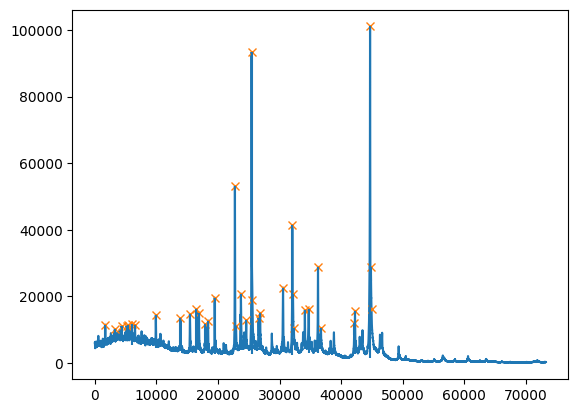

In [8]:
contour_heights = y[peaks] - prominences
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=y[peaks])
plt.show()

# Persistent Topology for Peak Detection

In [9]:
pt_peaks = algo.get_persistent_homology(y)
for i, pk in enumerate(pt_peaks):
    print(f'{i}:{pk.born},{pk.left},{pk.right},{pk.died}:\t{y[pk.born]}')
    if i > 10:
        break

0:44682,0,73215,None:	101070
1:25439,0,41108,41109:	93328
2:22732,22485,23253,23254:	53110
3:32056,28420,39333,28419:	41332
4:36227,33191,37318,33190:	28895
5:30550,30156,31677,31678:	22655
6:19452,0,21774,21775:	19638
7:23708,23262,25076,25077:	20845
8:16497,0,18976,18977:	16235
9:42232,41882,43910,43911:	15675
10:34714,33191,35510,35511:	16073
11:34094,33678,34442,34443:	15875


In [12]:
peaks = sorted([pk.born for pk in pt_peaks if y[pk.born]>8000] )
print(peaks[:10])
print(len(peaks))

[558, 1680, 1682, 1687, 1689, 1691, 1712, 2602, 2954, 3012]
418


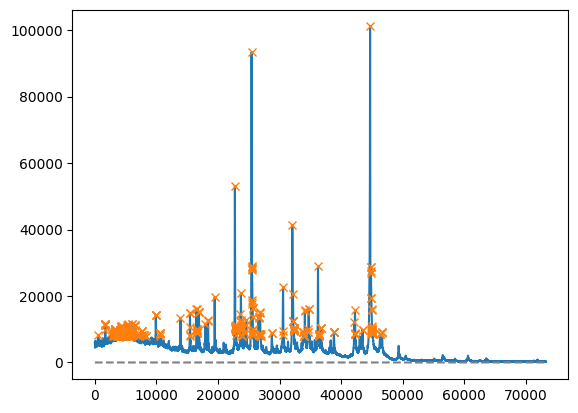

In [13]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()